In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
netflix_data = pd.read_csv('netflix.csv')

In [3]:
#Shape of the data
netflix_data.shape

(8807, 12)

In [4]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Number of rows with missing values - 3475**

In [8]:
netflix_data.isna().any(axis=1).sum()

3475

**Percentage of missing rows out of total rows - 39.46%**

In [9]:
round((netflix_data.isna().any(axis=1).sum()/len(netflix_data))*100,2)

39.46

**Number of missing values by columns**

In [10]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Percentage of missing values by columns**

In [11]:
netflix_data.isna().sum()/len(netflix_data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

**Check for the duplicate rows if any - No duplicate rows found**

In [12]:
netflix_data[netflix_data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
netflix_data.duplicated().sum()

0

In [14]:
# Lets see the type of content we have
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

**For separate analysis of Movies and TV Shows lets distinguish them**

In [15]:
netflix_data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**We have 69% Movies data and 30% TV Shows data**

In [16]:
netflix_data['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [17]:
netflix_data['type'].value_counts()/len(netflix_data)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [18]:
netflix_data['type'].nunique()

2

**Unnesting the director column**

In [19]:
netflix_data['director'].sample(10)

858             Mohamed Diab
7310         Ellen Weissbrod
4389                     NaN
95                       NaN
1080                 Zhao Ji
2901    Tom Barton-Humphreys
4938             Ryan Polito
739          Chris Appelhans
3898                     NaN
7409           Everardo Gout
Name: director, dtype: object

In [20]:
constraint1 = netflix_data['director'].apply(lambda x: str(x).split(', ')).to_list()

In [21]:
constraint1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [22]:
df_new1 = pd.DataFrame(constraint1, index = netflix_data['title'])

In [23]:
df_new1.stack()

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [24]:
df_new1 =df_new1.stack()

In [25]:
df_new1

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [26]:
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns = {0:'Director'},inplace = True)
df_new1.drop('level_1',axis = 1,inplace = True)
df_new1.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


**Unnesting the cast column**

In [27]:
constraint2 = netflix_data['cast'].apply(lambda x : str(x).split(', ')).to_list()

In [28]:
constraint2

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [29]:
df_new2 = pd.DataFrame(constraint2,index=netflix_data['title'])
df_new2 = df_new2.stack()

In [30]:
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Cast'},inplace = True)
df_new2.drop('level_1',axis = 1,inplace = True)
df_new2.head()

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


**Unnesting the Listed in Columns** 

In [31]:
constraint3 = netflix_data['listed_in'].apply(lambda x : str(x).split(', ')).to_list()
df_new3 = pd.DataFrame(constraint3,index=netflix_data['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'listed_in'},inplace = True)
df_new3.drop('level_1',axis = 1,inplace = True)
df_new3.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [32]:
df_new3.groupby('listed_in').count()

,title
listed_in,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


**Comedies are generally popular so lets see how many contents we have from comedy genre - 2654**

In [33]:
len(df_new3[df_new3['listed_in'].str.lower().str.contains('comed')])

2654

**Unnesting the Country Columns** 

In [34]:
constraint4 = netflix_data['country'].apply(lambda x : str(x).split(', ')).to_list()
df_new4 = pd.DataFrame(constraint4,index=netflix_data['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace = True)
df_new4.drop('level_1',axis = 1,inplace = True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


**The Country leading in overall content creation**

In [35]:
df_new4.groupby('country', as_index=False)['title'].count().sort_values('title', ascending = False)

,country,title
119,United States,3689
47,India,1046
127,nan,831
117,United Kingdom,804
22,Canada,445
...,...,...
70,Mongolia,1
101,Somalia,1
36,Ethiopia,1
15,Botswana,1


In [36]:
df_new4.groupby('country', as_index=False).agg({'title':'nunique'}).sort_values('title', ascending = False)

,country,title
119,United States,3689
47,India,1046
127,nan,831
117,United Kingdom,804
22,Canada,445
...,...,...
70,Mongolia,1
101,Somalia,1
36,Ethiopia,1
15,Botswana,1


In [37]:
df_new4['country'].value_counts()[:10]

United States     3689
India             1046
nan                831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: country, dtype: int64

In [38]:
# Merging the unnested director data with unnested cast data
df_new5 = df_new2.merge(df_new1,on='title',how = 'inner')
#Merging the above unnested data with genre data
df_new6 = df_new5.merge(df_new3,on= 'title',how = 'inner')
#Merging the above unnested data with country data
df_new = df_new6.merge(df_new4,on= 'title',how = 'inner')

In [39]:
df_new

,title,Cast,Director,listed_in,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [40]:
# Replace nan values of cast and director by unknown
df_new['Cast'].replace('nan','unknown',inplace = True)
df_new['Director'].replace('nan','unknown',inplace = True)
df_new['country'].replace('nan',np.nan, inplace = True)

In [41]:
df_new

,title,Cast,Director,listed_in,country
0,Dick Johnson Is Dead,unknown,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,unknown,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,unknown,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,unknown,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,unknown,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [42]:
# Merging our unnested data with original data
df_final = df_new.merge(netflix_data[['show_id', 'type', 'title', 'date_added',
                          'release_year', 'rating', 'duration']],on = 'title', how = 'left')
df_final.head()

,title,Cast,Director,listed_in,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,unknown,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,unknown,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,unknown,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [43]:
#checking nulls again
df_final.isna().sum()/len(df_final)*100

title           0.000000
Cast            0.000000
Director        0.000000
listed_in       0.000000
country         5.889866
show_id         0.000000
type            0.000000
date_added      0.078221
release_year    0.000000
rating          0.033170
duration        0.001485
dtype: float64

In [44]:
df_final.dropna(subset=['duration','rating','release_year'],axis = 0, inplace= True)

In [45]:
df_final['country'].fillna(df_final['country'].value_counts().idxmax(),inplace = True)

In [46]:
type(df_final['country'].value_counts())

pandas.core.series.Series

In [47]:
df_final['year_added'] = df_final['date_added'].str.split(',',expand = True)[1]
df_final['year_added']

0          2021
1          2021
2          2021
3          2021
4          2021
          ...  
201986     2019
201987     2019
201988     2019
201989     2019
201990     2019
Name: year_added, Length: 201921, dtype: object

In [48]:
# Explanation
df_final['date_added'].str.split(',',expand = True)

,0,1
0,September 25,2021
1,September 24,2021
2,September 24,2021
3,September 24,2021
4,September 24,2021
...,...,...
201986,March 2,2019
201987,March 2,2019
201988,March 2,2019
201989,March 2,2019


**Analyzing Data for Movies and TV Shows separately**

In [49]:
df_shows = df_final[df_final['type'] == 'TV Show']
df_movies = df_final[df_final['type'] == 'Movie']

In [50]:
df_movies

,title,Cast,Director,listed_in,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,unknown,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,91 min,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,91 min,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,91 min,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,91 min,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019


**Max Movies rated as - TV-MA , count = 2062**

In [51]:
df_movies.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending  = False)

,rating,title
8,TV-MA,2062
6,TV-14,1427
5,R,797
9,TV-PG,540
4,PG-13,490
3,PG,287
11,TV-Y7,139
10,TV-Y,131
7,TV-G,126
2,NR,75


**Max TV Shows rated as - TV-MA, count = 1145**

In [53]:
df_shows

,title,Cast,Director,listed_in,country,show_id,type,date_added,release_year,rating,duration,year_added
1,Blood & Water,Ama Qamata,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
2,Blood & Water,Ama Qamata,unknown,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
3,Blood & Water,Ama Qamata,unknown,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
4,Blood & Water,Khosi Ngema,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
5,Blood & Water,Khosi Ngema,unknown,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201864,Zindagi Gulzar Hai,Hina Khawaja Bayat,unknown,Romantic TV Shows,Pakistan,s8801,TV Show,"December 15, 2016",2012,TV-PG,1 Season,2016
201865,Zindagi Gulzar Hai,Hina Khawaja Bayat,unknown,TV Dramas,Pakistan,s8801,TV Show,"December 15, 2016",2012,TV-PG,1 Season,2016
201932,Zombie Dumb,unknown,unknown,Kids' TV,United States,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons,2019
201933,Zombie Dumb,unknown,unknown,Korean TV Shows,United States,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons,2019


In [54]:
df_shows.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

,rating,title
4,TV-MA,1145
2,TV-14,733
5,TV-PG,323
7,TV-Y7,195
6,TV-Y,176
3,TV-G,94
0,NR,5
1,R,2
8,TV-Y7-FV,1


In [55]:
df_movies.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values('title',ascending = False)

,duration,title
195,90 min,152
198,93 min,146
199,94 min,146
202,97 min,146
196,91 min,144
...,...,...
124,253 min,1
127,273 min,1
130,3 min,1
133,312 min,1


**Avg duration of movie? - 107 mins**

In [56]:
df_movies['duration'] = df_movies['duration'].str.split(expand = True)[0]


C:\Users\mayur\AppData\Local\Temp\ipykernel_14160\2392007533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.split(expand = True)[0]


In [57]:
round(df_movies['duration'].astype(int).mean())

107

**Avg duration of tv shows? - 2 Seasons**

In [58]:
df_shows['duration'] = df_shows['duration'].str.split(expand = True)[0]

C:\Users\mayur\AppData\Local\Temp\ipykernel_14160\646059231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration'] = df_shows['duration'].str.split(expand = True)[0]


In [59]:
round(df_shows['duration'].astype(int).mean())

2

**Duration of most movies is between 80 to 100 Mins**

In [60]:
df_movies.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)

,duration,title
195,90,152
198,93,146
199,94,146
202,97,146
196,91,144
...,...,...
124,253,1
127,273,1
130,3,1
133,312,1


In [61]:
df_movies['duration'].astype(int)

0          90
159        91
160        91
161        91
162        91
         ... 
201986    111
201987    111
201988    111
201989    111
201990    111
Name: duration, Length: 145831, dtype: int32

In [62]:
bins = [1,50,80,100,120,150,200,315]
labels = ['1-50','50-80', '80-100', '100-120', '120-150', '150-200', '200-315']

In [63]:
df_movies['duration_bins'] = pd.cut(df_movies['duration'].astype(int),bins = bins,labels=labels)

C:\Users\mayur\AppData\Local\Temp\ipykernel_14160\401500503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_bins'] = pd.cut(df_movies['duration'].astype(int),bins = bins,labels=labels)


In [64]:
df_movies.groupby('duration_bins').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)

,duration_bins,title
2,80-100,2221
3,100-120,1671
4,120-150,897
1,50-80,806
0,1-50,286
5,150-200,226
6,200-315,19


In [65]:
#practice Binning
pd.cut(df_movies['duration'].astype(int),bins = [1,50,100,200])

0          (50, 100]
159        (50, 100]
160        (50, 100]
161        (50, 100]
162        (50, 100]
             ...    
201986    (100, 200]
201987    (100, 200]
201988    (100, 200]
201989    (100, 200]
201990    (100, 200]
Name: duration, Length: 145831, dtype: category
Categories (3, interval[int64, right]): [(1, 50] < (50, 100] < (100, 200]]

**Duration of most tv shows - 1 Season**

In [66]:
df_shows.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)

,duration,title
0,1,1791
7,2,425
8,3,199
9,4,95
10,5,65
11,6,33
12,7,23
13,8,17
14,9,9
1,10,7


In [67]:
# Practice
df_shows.groupby('duration')['title'].nunique()

duration
1     1791
10       7
11       2
12       2
13       3
15       2
17       1
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
Name: title, dtype: int64

In [68]:
# Practice
df_shows['duration'].value_counts()

1     34977
2      9559
3      5084
4      2134
5      1698
7       843
6       633
8       286
9       257
10      220
13      132
12      111
15       96
17       30
11       30
Name: duration, dtype: int64

In [69]:
# Practice
df_shows.groupby('duration')['title'].count()

duration
1     34977
10      220
11       30
12      111
13      132
15       96
17       30
2      9559
3      5084
4      2134
5      1698
6       633
7       843
8       286
9       257
Name: title, dtype: int64

**Univariate Analysis separately for TV Shows and Movies**

In [70]:
df_final_copy = df_final.copy(deep=True)

In [71]:
df_final_copy

,title,Cast,Director,listed_in,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,unknown,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,2021
1,Blood & Water,Ama Qamata,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
2,Blood & Water,Ama Qamata,unknown,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
3,Blood & Water,Ama Qamata,unknown,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
4,Blood & Water,Khosi Ngema,unknown,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019


In [72]:
df_shows.groupby('listed_in', as_index=False).agg({'title':'nunique'}).sort_values('title',ascending = False)

,listed_in,title
5,International TV Shows,1350
15,TV Dramas,763
14,TV Comedies,580
3,Crime TV Shows,470
6,Kids' TV,450
4,Docuseries,395
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,253
0,Anime Series,175


In [73]:
df_movies.groupby('listed_in', as_index = False).agg({'title':'nunique'}).sort_values('title', ascending = False)

,listed_in,title
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


In [74]:
df_shows.groupby('country').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
country,
United States,1329
United Kingdom,272
Japan,198
South Korea,170
Canada,126
...,...
Switzerland,1
Hungary,1
Malta,1


In [75]:
df_movies.groupby('country').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
country,
United States,3187
India,962
United Kingdom,532
Canada,319
France,303
...,...
Nicaragua,1
Palestine,1
Panama,1


In [76]:
df_shows.groupby(['rating']).agg({'title':'nunique'}).sort_values(by=['title'],ascending =[False])

,title
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


In [77]:
df_movies.groupby(['rating']).agg({'title':'nunique'}).sort_values(by=['title'],ascending =[False])

,title
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


In [78]:
df_shows.groupby('duration').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
duration,
1,1791
2,425
3,199
4,95
5,65
6,33
7,23
8,17
9,9


In [79]:
df_movies.groupby('duration').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
duration,
90,152
93,146
94,146
97,146
91,144
...,...
253,1
273,1
3,1


**Actor Anupam Kher has starred in most number of movies**

In [80]:
df_cast = df_movies.groupby('Cast',as_index = False).agg({'title':'nunique'}).sort_values('title',ascending =False)
df_cast = df_cast[df_cast['Cast'] != 'unknown']
df_cast

,Cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30
638,Akshay Kumar,30
...,...,...
9990,Jacob Davich,1
9989,Jacob Craner,1
9988,Jacob Buster,1
9987,Jacob Blair,1


**Actor Takahiro Sakurai has starred in most number of netflix TvShows**

In [81]:
df_cast = df_shows.groupby('Cast',as_index=False).agg({'title':'nunique'}).sort_values('title',ascending = False)
df_cast = df_cast[df_cast['Cast']!='unknown'] 
df_cast

,Cast,title
13217,Takahiro Sakurai,25
14567,Yuki Kaji,19
2873,Daisuke Ono,17
6797,Junichi Suwabe,17
14551,Yuichi Nakamura,16
...,...,...
5446,Iván Pellicer,1
5448,Iván Álvarez de Araya,1
5449,Iza Moreira,1
5450,Izan Llunas,1


**Directors Ken Burns & Alastair Fothergil has most number of TV Shows over the netflix platform**

In [82]:
df_shows_directors = df_shows.groupby('Director',as_index=False)['title'].nunique().sort_values('title',ascending = False)
df_shows_directors=df_shows_directors[df_shows_directors['Director']!= 'unknown']
df_shows_directors

,Director,title
146,Ken Burns,3
8,Alastair Fothergill,3
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
...,...,...
99,Houda Benyamina,1
98,Hong Won-ki,1
97,Hiroyuki Seshita,1
96,Hikaru Toda,1


**Directors Rajiv Chilaka & Jan Suter has most number of Movies over the netflix platform**

In [83]:
df_movies_directors = df_movies.groupby('Director',as_index=False)['title'].nunique().sort_values('title',ascending = False)
df_movies_directors=df_movies_directors[df_movies_directors['Director']!= 'unknown']
df_movies_directors

,Director,title
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
2737,Marcus Raboy,15
...,...,...
2190,José Ortuño,1
596,Bob Persichetti,1
2192,Jovanka Vuckovic,1
595,Bob Odenkirk,1


**Univariate Analysis for TV Shows in Japan** 

In [84]:
df_shows_japan = df_shows[df_shows['country'] == 'Japan']

**Japnese usually prefer watching Anime Series**

In [85]:
df_shows_japan.groupby('listed_in').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
listed_in,
International TV Shows,150
Anime Series,142
Kids' TV,29
Romantic TV Shows,21
TV Dramas,21
Crime TV Shows,16
Teen TV Shows,14
TV Comedies,10
Reality TV,9


# Univariate Analysis for shows in South Korea

In [90]:
df_korea_shows = df_shows[df_shows['country']=='South Korea']

**Koreans prefer to watch Romantic Tv Shows**

In [95]:
df_korea_shows.groupby('listed_in',as_index = False).agg({'title':'nunique'}).sort_values('title',ascending = False)

,listed_in,title
1,International TV Shows,152
3,Korean TV Shows,132
5,Romantic TV Shows,77
9,TV Dramas,38
0,Crime TV Shows,24
8,TV Comedies,19
2,Kids' TV,16
7,TV Action & Adventure,9
4,Reality TV,4
6,Stand-Up Comedy & Talk Shows,4


**Number of Movies added on Netflix drastically increased from 2015**

In [101]:
graph_data = df_movies.groupby('year_added', as_index = False).agg({'title':'nunique'}).sort_values('title', ascending = True)

<AxesSubplot:xlabel='year_added'>

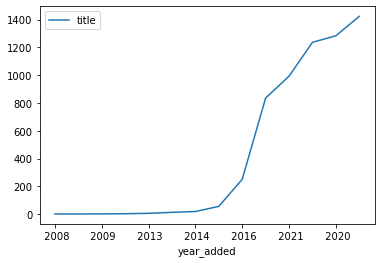

In [102]:
graph_data.plot(x = 'year_added', y = 'title')

**Number of TV Shows added to netlfix also increased drastically starting 2015**

In [104]:
graph_data_shows  = df_shows.groupby('year_added',as_index = False).agg({'title':'nunique'}).sort_values('title', ascending = True)

Text(0, 0.5, 'No. of shows')

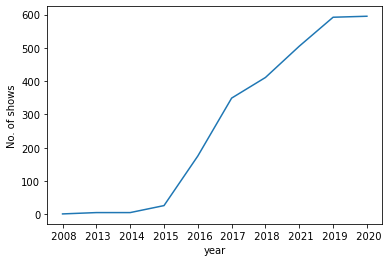

In [107]:
sns.lineplot(data = graph_data_shows, x = 'year_added', y ='title')
plt.xlabel('year')
plt.ylabel('No. of shows')

**Investigating most popular actor - director pairs**

In [109]:
df_usa_shows = df_shows[df_shows['country']=='United States']

In [120]:
df_usa_shows['cast_director_combo'] = df_usa_shows['Cast'].str.cat(df_usa_shows['Director'], sep=' and ')
df_usa_shows_subset = df_usa_shows[(df_usa_shows['Cast']!='unknown') & (df_usa_shows['Director']!='unknown')]

C:\Users\mayur\AppData\Local\Temp\ipykernel_14160\752285212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_shows['cast_director_combo'] = df_usa_shows['Cast'].str.cat(df_usa_shows['Director'], sep=' and ')


**Dave Chappelle and Stan Lathan have most movies together**

In [121]:
df_usa_shows_subset.groupby('cast_director_combo').agg({'title':'nunique'}).sort_values("title",ascending = False)

,title
cast_director_combo,
Dave Chappelle and Stan Lathan,2
Morgan Freeman and Ken Burns,1
Michela Luci and Kyran Kelly,1
Miggy Jimenez and Ivan Andrew Payawal,1
Miki Esparbé and Oriol Paulo,1
...,...
Gajraj Rao and Vasan Bala,1
Garrison Keillor and Ken Burns,1
Garth Brooks and Glenn Weiss,1


In [125]:
df_movies_india = df_movies[df_movies['country']=='India']
df_movies_india['cast_director_combo'] = df_movies_india['Cast'].str.cat(df_movies_india['Director'], sep = " and ")
df_movies_india_subset = df_movies_india[(df_movies_india['Cast']!='unknown')&(df_movies_india['Director']!='unknown')]

C:\Users\mayur\AppData\Local\Temp\ipykernel_14160\1506363598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_india['cast_director_combo'] = df_movies_india['Cast'].str.cat(df_movies_india['Director'], sep = " and ")


**Anupam Kher and David Dhawan combo is famous in Indian Movies** 

In [126]:
df_movies_india_subset.groupby('cast_director_combo', as_index = False).agg({'title':'nunique'}).sort_values('title',ascending = False)

,cast_director_combo,title
742,Anupam Kher and David Dhawan,6
369,Alok Nath and Sooraj R. Barjatya,5
5412,Salman Khan and Sooraj R. Barjatya,5
2577,Julie Tejwani and Rajiv Chilaka,4
3552,Mithun Chakraborty and Umesh Mehra,4
...,...,...
2524,Johny Lever and Anthony D'Souza,1
2523,Johny Lever and Anil V. Kumar,1
2522,Johny Lever and Akashdeep,1
2521,Johny Lever and Abbas Alibhai Burmawalla,1


# Univariate Analysis

**International movies, Dramas, Comedies Documentaries are popular genres across all countries**

In [130]:
df_final.groupby('listed_in').agg({'title':'nunique'}).sort_values('title',ascending = False).iloc[:6,]

,title
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1350
Documentaries,869
Action & Adventure,859


**Target Audience:** <br>
**Due to large audience of 14+ in India 14+ content is highly recommended** <br>
**Content of rating "MA" is recommended for USA**

In [134]:
df_final_india = df_final[df_final['country']=='India']
df_final_india.groupby('rating').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
rating,
TV-14,572
TV-MA,266
TV-PG,144
TV-Y7,17
PG-13,11
TV-G,10
NR,7
PG,7
TV-Y,6


In [135]:
df_final_usa = df_final[df_final['country']=='United States']
df_final_usa.groupby('rating').agg({'title':'nunique'}).sort_values('title',ascending = False)

,title
rating,
TV-MA,1376
TV-14,727
R,671
PG-13,441
TV-PG,394
PG,249
TV-Y7,245
TV-Y,207
TV-G,119
